# SABR Model for Interest Rates

We examine the SABR model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from financepy.utils import *
from financepy.models.sabr import *

## SABR Model

I examine the volatility as a function of strike

In [4]:
strikes = np.linspace(0.01, 0.10, 100)

In [5]:
f = 0.032

In [6]:
texp = 2.0

In [7]:
alpha = 0.174; beta = 1.0; rho = -0.90; nu = 0.817

In [8]:
model = SABR(alpha, beta, rho, nu)

In [9]:
model

OBJECT TYPE: SABR
Alpha: 0.174
Beta: 1.0
Nu: 0.817
Rho: -0.9

In [10]:
volsSABR = model.black_vol(f, strikes, texp) * 100

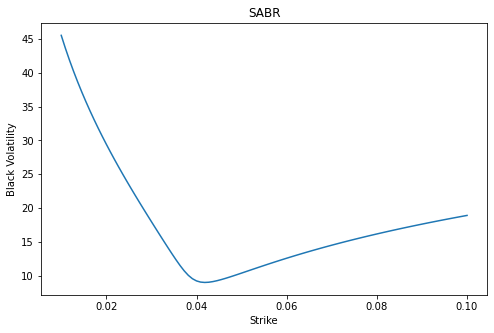

In [11]:
plt.figure(figsize=(8,5))
plt.plot(strikes, volsSABR)
plt.title("SABR")
plt.xlabel("Strike")
plt.ylabel("Black Volatility");

## Calibration - Fitting to the ATM Vol

In [12]:
blackVol = 0.22

In [13]:
f = 0.032

In [14]:
k = f

In [15]:
model.set_alpha_from_atm_black_vol(blackVol, k, texp)

In [16]:
model

OBJECT TYPE: SABR
Alpha: 0.2486852107791646
Beta: 1.0
Nu: 0.817
Rho: -0.9

In [17]:
model.black_vol(f, k, texp) * 100

22.000000000000004

The SABR model now fits the ATM volatility exactly

In [18]:
volsSABR = model.black_vol(f, strikes, texp) * 100

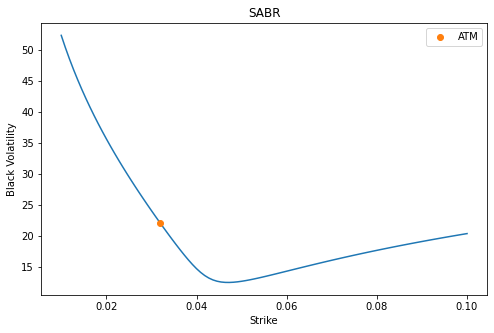

In [19]:
plt.figure(figsize=(8,5))
plt.plot(strikes, volsSABR)
plt.title("SABR")
plt.xlabel("Strike")
plt.ylabel("Black Volatility")
plt.plot(k, blackVol*100, 'o', label="ATM")
plt.legend()

## Calibration - Fitting to the Any Strike Vol

In [20]:
blackVol = 0.26

In [21]:
f = 0.032

In [22]:
k = 0.040

In [23]:
model.set_alpha_from_black_vol(blackVol, f, k, texp)

In [24]:
model

OBJECT TYPE: SABR
Alpha: 0.3975370245099663
Beta: 1.0
Nu: 0.817
Rho: -0.9

In [25]:
volsSABR = model.black_vol(f, strikes, texp) * 100

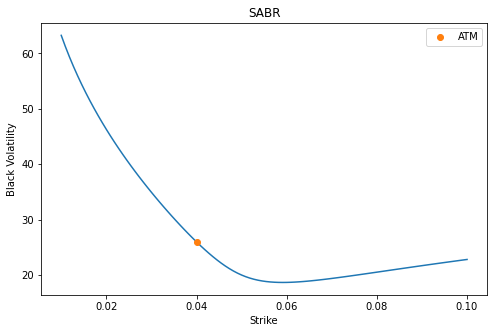

In [26]:
plt.figure(figsize=(8,5))
plt.plot(strikes, volsSABR)
plt.title("SABR")
plt.xlabel("Strike")
plt.ylabel("Black Volatility")
plt.plot(k, blackVol*100, 'o', label="ATM")
plt.legend();

Copyright (c) 2020 Dominic O'Kane